In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
file_path = "C:\\Users\\HP\\Downloads\\ai_tools_usage_2023.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Tool Name,Category,Usage Count,Month,Region,Industry,User Type
0,DALL-E,Generative AI,7177,2023-04-01,Africa,Education,Enterprise
1,BERT,Text-to-Image,18848,2023-04-01,South America,Entertainment,Individual
2,BERT,Generative AI,13036,2023-09-01,Africa,Technology,SMB
3,DALL-E,Generative AI,23965,2023-11-01,Africa,Finance,Individual
4,Stable Diffusion,Text-to-Image,18056,2023-10-01,North America,Healthcare,SMB


##  Data Preparation:
### Clean and preprocess data on AI tool usage.

In [4]:
#Convert 'Month' Column to Datetime
df['Month'] = pd.to_datetime(df['Month'].astype(str) )


## Tool Adoption Analysis
### Aggregate Usage by Tool
#### Calculate the total usage count for each AI tool over time to understand the adoption rate.

In [5]:
# Aggregate usage count by tool
tool_adoption = df.groupby('Tool Name')['Usage Count'].sum().sort_values(ascending=False)

# Display the adoption rates
print(tool_adoption)

Tool Name
BERT                2635617
DALL-E              2591799
ChatGPT             2379396
Stable Diffusion    2262861
Name: Usage Count, dtype: int64


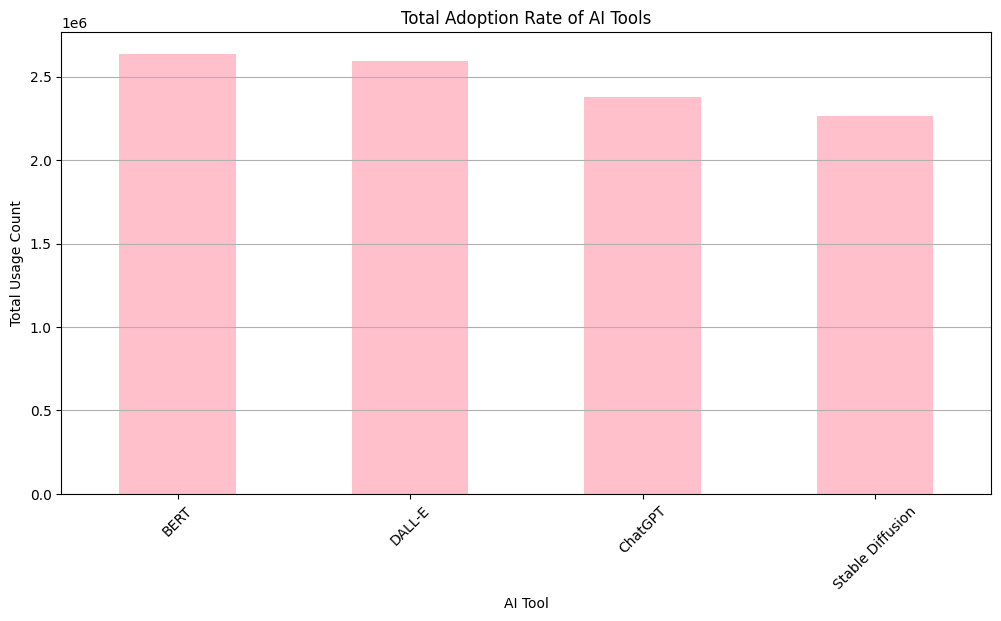

In [27]:
# Plot adoption rates

plt.figure(figsize=(12, 6))
tool_adoption.plot(kind='bar', color='pink')
plt.title('Total Adoption Rate of AI Tools')
plt.xlabel('AI Tool')
plt.ylabel('Total Usage Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Monthly AI Tool Usage Count in 2023

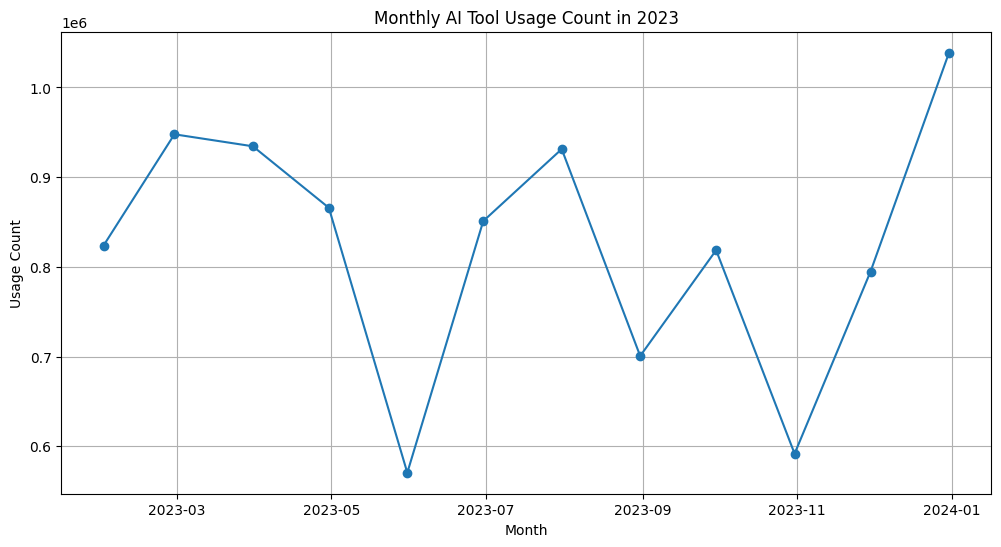

In [12]:
#Summarize Usage Count per Month
monthly_usage = df.groupby('Month')['Usage Count'].sum().sort_index()

#Resample to Monthly Frequency
monthly_usage = monthly_usage.resample('ME').sum()

#Plot Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(monthly_usage, marker='o')
plt.title('Monthly AI Tool Usage Count in 2023')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.grid(True)
plt.show()

### Analyze tool adoption by category.

<Figure size 1200x600 with 0 Axes>

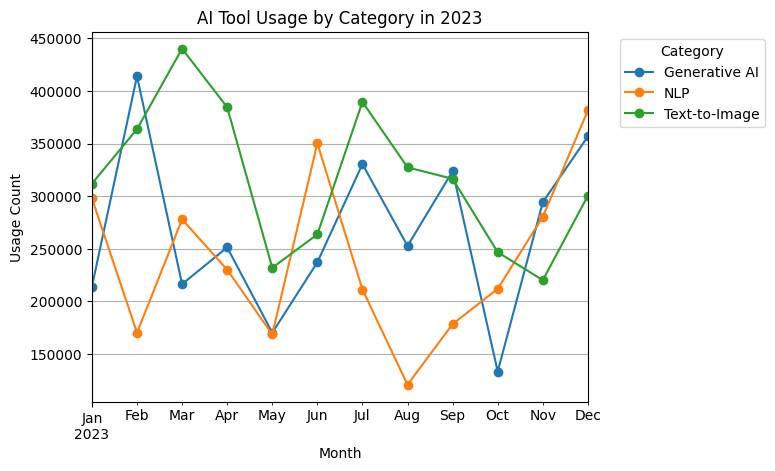

In [17]:

category_usage = df.groupby(['Month', 'Category'])['Usage Count'].sum().unstack()

plt.figure(figsize=(12, 6))
category_usage.plot(marker='o')
plt.title('AI Tool Usage by Category in 2023')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Prepare the data for stacked area plot

<Figure size 1200x800 with 0 Axes>

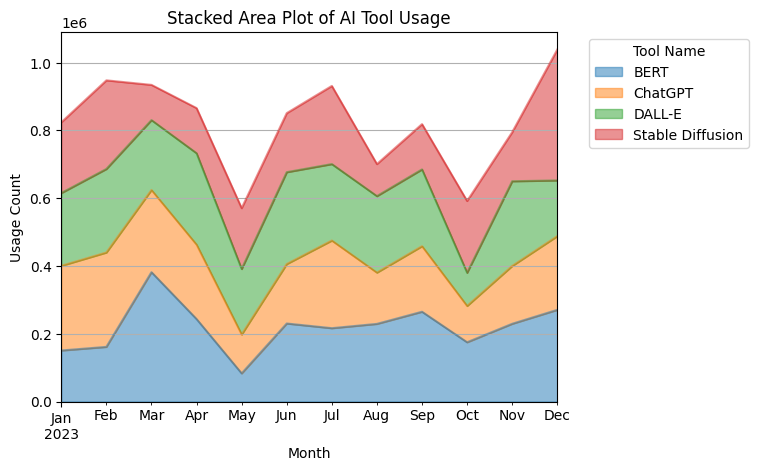

In [19]:

stacked_usage = df.pivot_table(values='Usage Count', index='Month', columns='Tool Name', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
stacked_usage.plot.area(stacked=True, alpha=0.5)
plt.title('Stacked Area Plot of AI Tool Usage')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend(title='Tool Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Aggregate usage by region and month

<Figure size 1200x800 with 0 Axes>

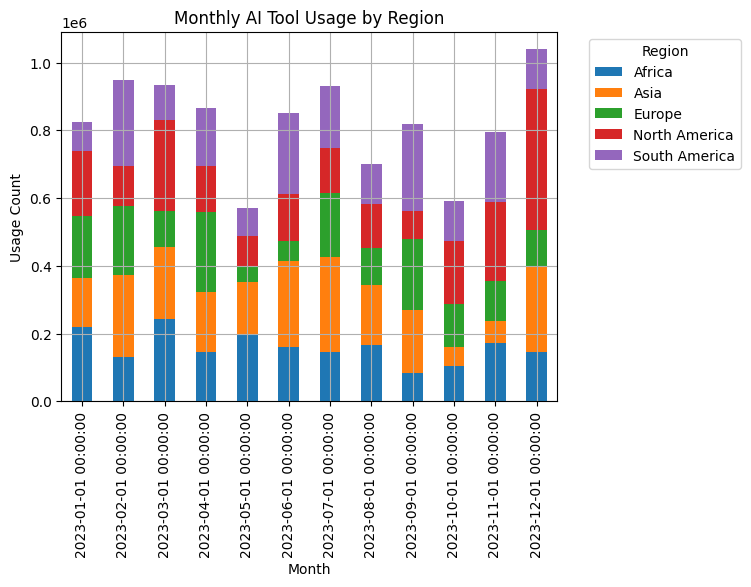

In [20]:

region_usage = df.groupby(['Month', 'Region'])['Usage Count'].sum().unstack()

plt.figure(figsize=(12, 8))
region_usage.plot(kind='bar', stacked=True)
plt.title('Monthly AI Tool Usage by Region')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Rolling Window Analysis

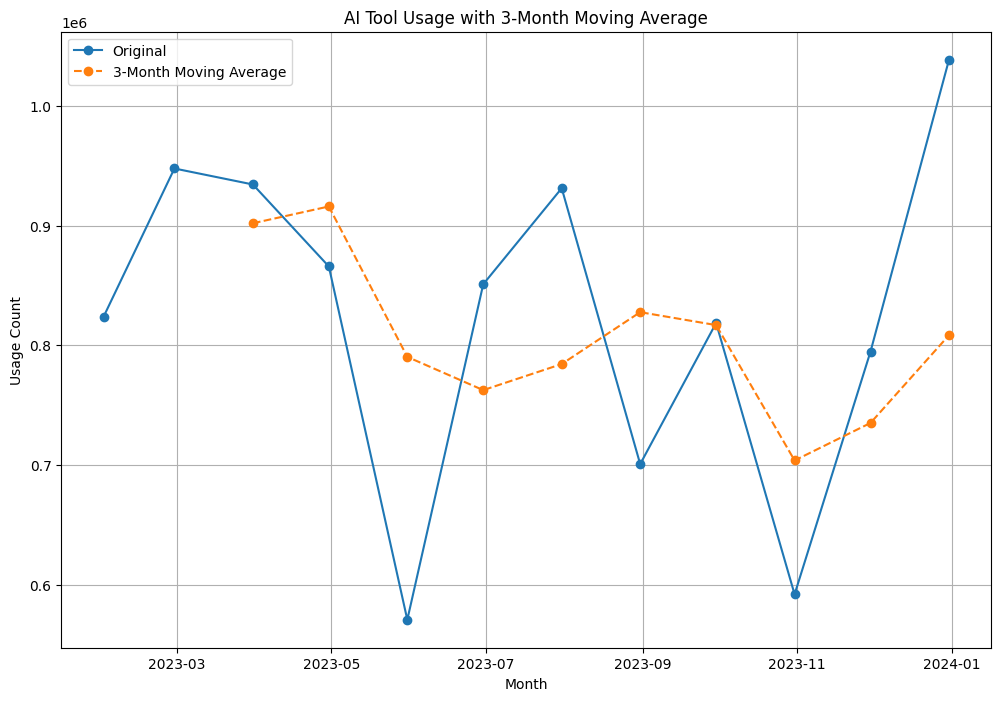

In [13]:
rolling_usage = monthly_usage.rolling(window=3).mean()

plt.figure(figsize=(12, 8))
plt.plot(monthly_usage, label='Original', marker='o')
plt.plot(rolling_usage, label='3-Month Moving Average', marker='o', linestyle='--')
plt.title('AI Tool Usage with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend()
plt.grid(True)
plt.show()

### Seasonal Decomposition

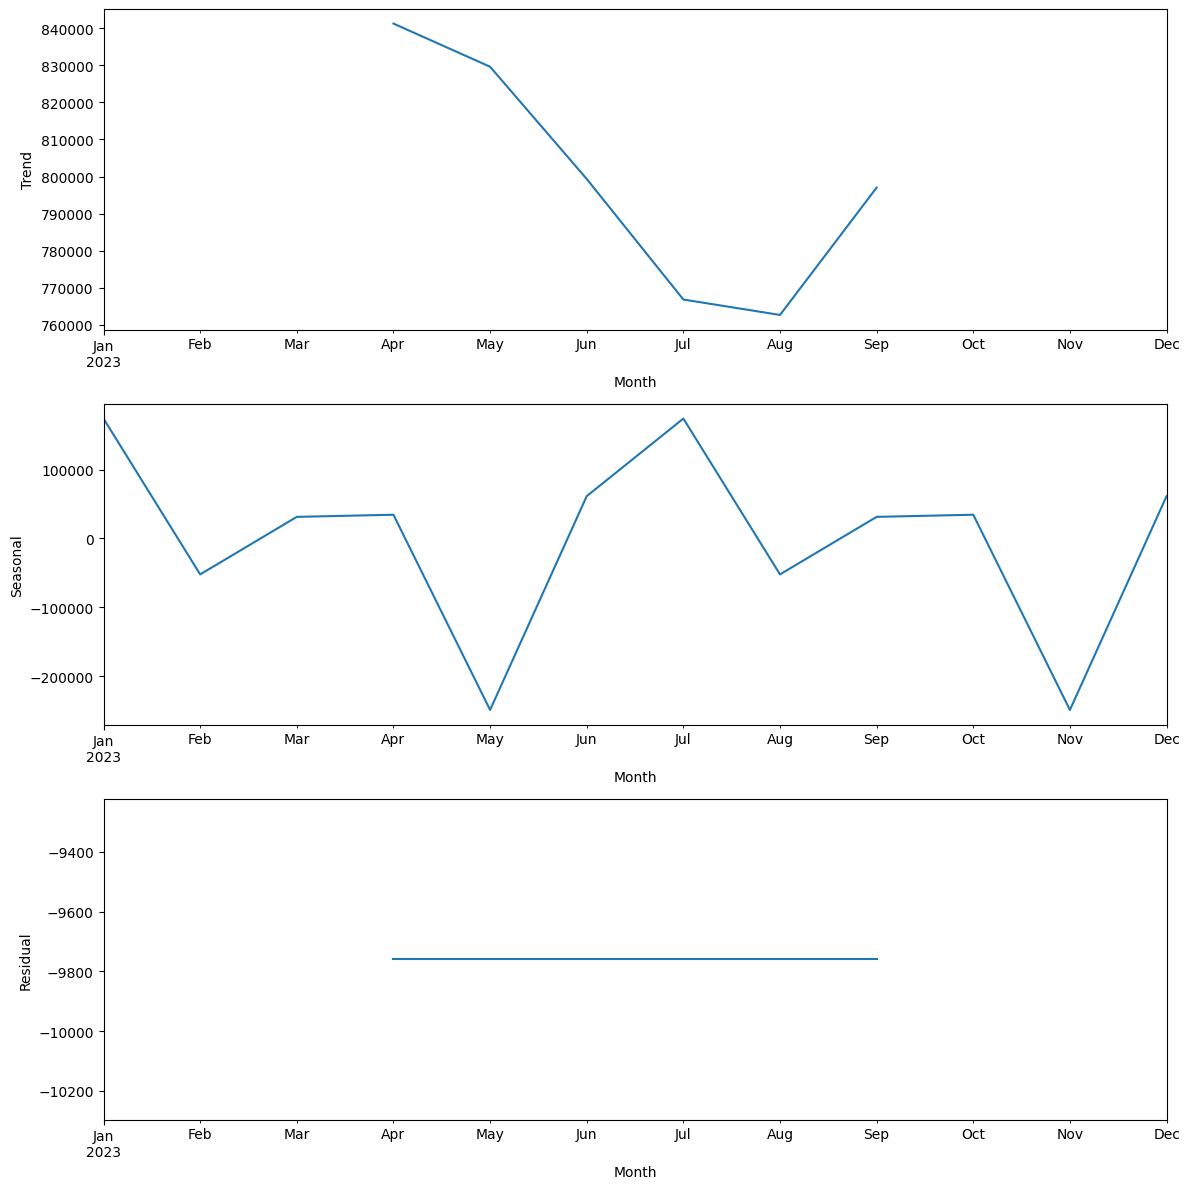

In [15]:
try:
    decomposition = seasonal_decompose(monthly_usage, model='additive', period=6)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
    decomposition.trend.plot(ax=ax1)
    ax1.set_ylabel('Trend')
    ax1.set_xlabel('Month')
    decomposition.seasonal.plot(ax=ax2)
    ax2.set_ylabel('Seasonal')
    ax2.set_xlabel('Month')
    decomposition.resid.plot(ax=ax3)
    ax3.set_ylabel('Residual')
    ax3.set_xlabel('Month')
    plt.tight_layout()
    plt.show()
except ValueError as e:
    print(f"Error in seasonal decomposition: {e}")

## Trend Forecasting:
### Forecast future trends in AI tool usage.


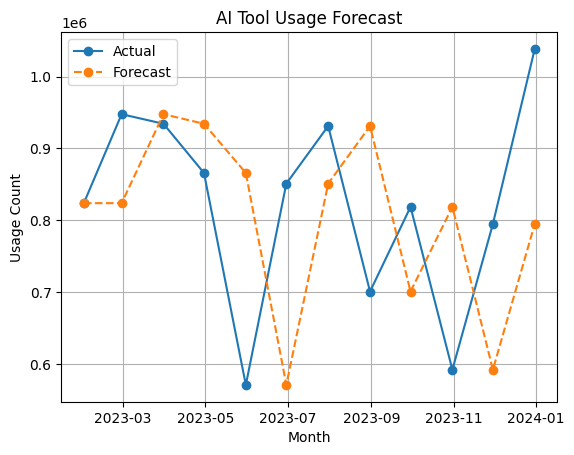

In [18]:
forecast = monthly_usage.shift(1).bfill()
plt.plot(monthly_usage, label='Actual', marker='o')
plt.plot(forecast, label='Forecast', marker='o', linestyle='--')
plt.title('AI Tool Usage Forecast')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend()
plt.grid(True)
plt.show()

## Visualization: 
### Create visualizations to showcase the findings.

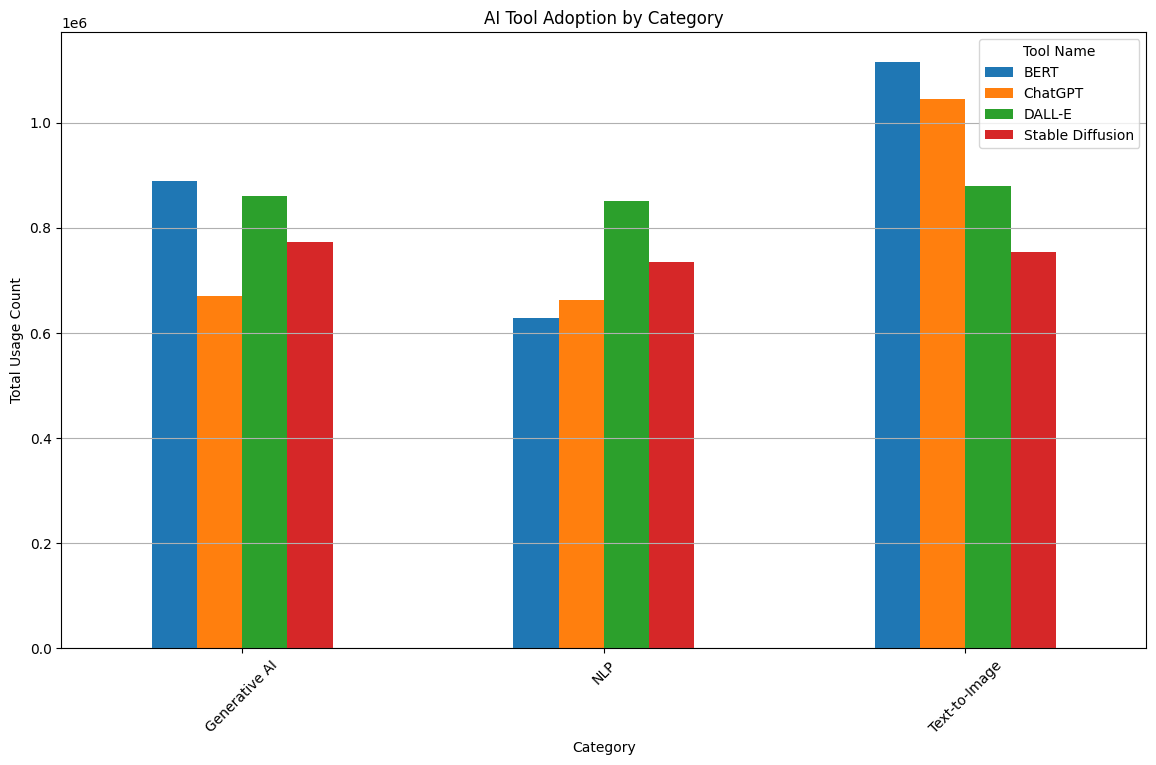

In [23]:
# Aggregate usage by tool and category
category_tool_usage = df.groupby(['Category', 'Tool Name'])['Usage Count'].sum().unstack().fillna(0)

# Plot adoption by category
category_tool_usage.plot(kind='bar', figsize=(14, 8))
plt.title('AI Tool Adoption by Category')
plt.xlabel('Category')
plt.ylabel('Total Usage Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()